## Import Library

In [157]:
# Import required packages 
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import log_loss
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.model_selection import GridSearchCV,KFold,LeaveOneOut
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.manifold import Isomap
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
import umap

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

## 1. Exploratory Data Analysis and Visualisations

### 1.1Description

The colon dataset contains expression levels of 2000 genes taken in 62 different samples. For each sample the colon_label indicates whether the sample came from a tumor biopsy or not. The data has too much attributes and small sample size. Numbers and descriptions for the different genes are also given. This dataset is used in many different research papers on gene expression data. It can be used in two ways: you can treat the 62 samples as records in a high-dimensional space, or you can treat the genes as records with 62 attributes.

In [32]:
#Download colon data and label
colon = pd.read_csv('colonCancerData.csv', index_col=0) # Gene expression
colon_label = pd.read_csv('label.csv') # labels 

In [33]:
# Display the basic information about the colon dataframe.
colon.info() 
print("There are {} entries and {} columns in the landsat_train DataFrame"\
      .format(colon.shape[0], colon.shape[1]))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Columns: 2000 entries, 0 to 1999
dtypes: float64(2000)
memory usage: 969.2 KB
There are 62 entries and 2000 columns in the landsat_train DataFrame


 ### 1.2 Preliminary inspections

In [34]:
# Display the basic information about the colon dataframe.
colon.info() 
print("There are {} entries and {} columns in the landsat_train DataFrame"\
      .format(colon.shape[0], colon.shape[1]))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Columns: 2000 entries, 0 to 1999
dtypes: float64(2000)
memory usage: 969.2 KB
There are 62 entries and 2000 columns in the landsat_train DataFrame


Use describe() to generates summary statistics about the columns in a DataFrame.

In [35]:
colon.describe()

0             1            2             3            4  \
count     62.000000     62.000000    62.000000     62.000000    62.000000   
mean    7015.786710   4966.960015  4094.727879   3987.789284  2937.126113   
std     3092.970584   2188.890480  1818.080939   2019.086903  1356.932887   
min     1914.677500   1383.488600  1269.648700   1186.030400  1166.553600   
25%     4877.364700   3408.951150  2763.725900   2648.942875  1890.857125   
50%     6274.612500   4738.280700  3890.338100   3451.498200  2666.075600   
75%     8712.283175   6455.843200  5008.993750   4738.408950  3563.969325   
max    14876.407000  10152.273000  8605.043800  11248.680000  8093.875000   

                  5            6            7             8             9  \
count     62.000000    62.000000    62.000000     62.000000     62.000000   
mean    4705.119302  3588.800323  2872.288631   4680.191160   4039.661953   
std     2400.848112  1872.106095  1122.365448   2417.239217   2018.044248   
min     1087.750000  1062.697500  1026.477500    995.790000    974.815480   
25%     2843.368775  2112.952150  2050.814025   2971.792775   2797.992525   
50%     4416.617850  3438.180000  2844.960650   4088.735600   3823.017900   
75%     6076.032125  4420.645350  3414.228475   6171.382800   4840.715500   
max    11222.682000  9939.246200  5917.026300  14144.835000  12307.913000   

       ...        1990        1991        1992        1993        1994  \
count  ...   62.000000   62.000000   62.000000   62.000000   62.000000   
mean   ...  186.204531  100.227903  293.222722  124.653387  133.186935   
std    ...  117.605889   78.022712  179.249194   75.535838  101.372557   
min    ...    5.950000    5.935000    5.925000    5.923750    5.916250   
25%    ...  117.778870   48.409375  161.518125   69.121250   71.637500   
50%    ...  152.722620   83.080625  251.883125  114.658125  104.271875   
75%    ...  247.298513  117.208438  424.742500  177.730312  149.772188   
max    ...  725.338100  438.383750  902.572500  333.418750  464.930000   

             1995        1996        1997        1998        1999  
count   62.000000   62.000000   62.000000   62.000000   62.000000  
mean   184.136635   84.118387  114.930000   53.251230   42.965827  
std    159.914871   86.182028   88.011866   38.462814   28.395175  
min      5.888095    5.878750    5.848750    5.842500    5.816250  
25%     85.905059   30.701875   53.881563   27.334375   24.610000  
50%    142.578570   56.385625   93.825625   45.358125   34.775000  
75%    212.019940  101.231250  145.074062   66.235312   54.697500  
max    702.130950  405.600000  390.890000  197.220000  126.826250  

[8 rows x 2000 columns]

### 1.3 Class Label

In colon_label the negative number indicates colon cancer tissues while the postive number is normal tissues.

In [36]:
def ConvertLabels(labels):
    '''
    This function is used to convert the label to 0 and 1 range.
    Label 1 means normal tissue, label 0 means tumor tissue
    '''
    
    column_name = 'label'
    labels.loc[colon_label[column_name] > 0] = 1
    labels.loc[colon_label[column_name] < 0] = 0
    
    return labels

In [37]:
#Convert the colon label and concatenate data and label.
colon_label = ConvertLabels(colon_label)
data_label = pd.concat([colon, colon_label], axis = 1, sort= False)

# Seperate the data into two class. One is with label 1 and another is label 0
data_label_1 = data_label[data_label['label']==1] # normal tissue
data_label_0 = data_label[data_label['label']==0] # tumor tissue


 Compute further statistics about the columns in a DataFrame.

In [38]:
print('Skewness:\n{}'.format(skew(data_label_1)[:-1])) # Get rid of label column 
print('Kurtosis:\n{}'.format(kurtosis(data_label_0)[:-1])) # Get rid of label column

Skewness:
[1.20995419 0.56073958 0.21065872 ... 1.43448216 1.68050172 1.84446222]
Kurtosis:
[-0.0733059  -0.63324882 -0.63758575 ...  1.19712934  2.51481495
 -0.2151123 ]


In [39]:
print('The number of right skewness distribution in data_label_1:{}'.format(sum(skew(data_label_1)[:-1] > 0)))
print('The number of right skewness distribution in data_label_0:{}'.format(sum(skew(data_label_0)[:-1] > 0)))
print('This means the dataset has a larger number of right skewed distribution, which illustrates that in large part of samples, there are lots of large positive outlier.')

The number of right skewness distribution in data_label_1:1827
The number of right skewness distribution in data_label_0:2000
This means the dataset has a larger number of right skewed distribution, which illustrates that in large part of samples, there are lots of large positive outlier.


In [41]:
print('The number of kurtosis in data_label_1:{}'.format(sum(kurtosis(data_label_1)[:-1] > 3)))
print('The number of kurtosis in data_label_0:{}'.format(sum(kurtosis(data_label_0)[:-1] > 3)))
print('This means there is a small number of datasets which have a higher peak than standard distribution')

The number of kurtosis in data_label_1:192
The number of kurtosis in data_label_0:538
This means there is a small number of datasets which have a higher peak than standard distribution


### 1.4 Visualising distributions

Firstly,  get a feel for the distribution of the various features in the dataset. Here, we show the kernel density estimate for the first 80 gene intensity values, separately for each class. From this figure, We can see that most of the samples based on 1(normal tissue), has a lager number than the samples based on 0(tumor tissue).We can find some genes with significient different kurtosis and skewness may be useful to classify normal and tumor tissue. 

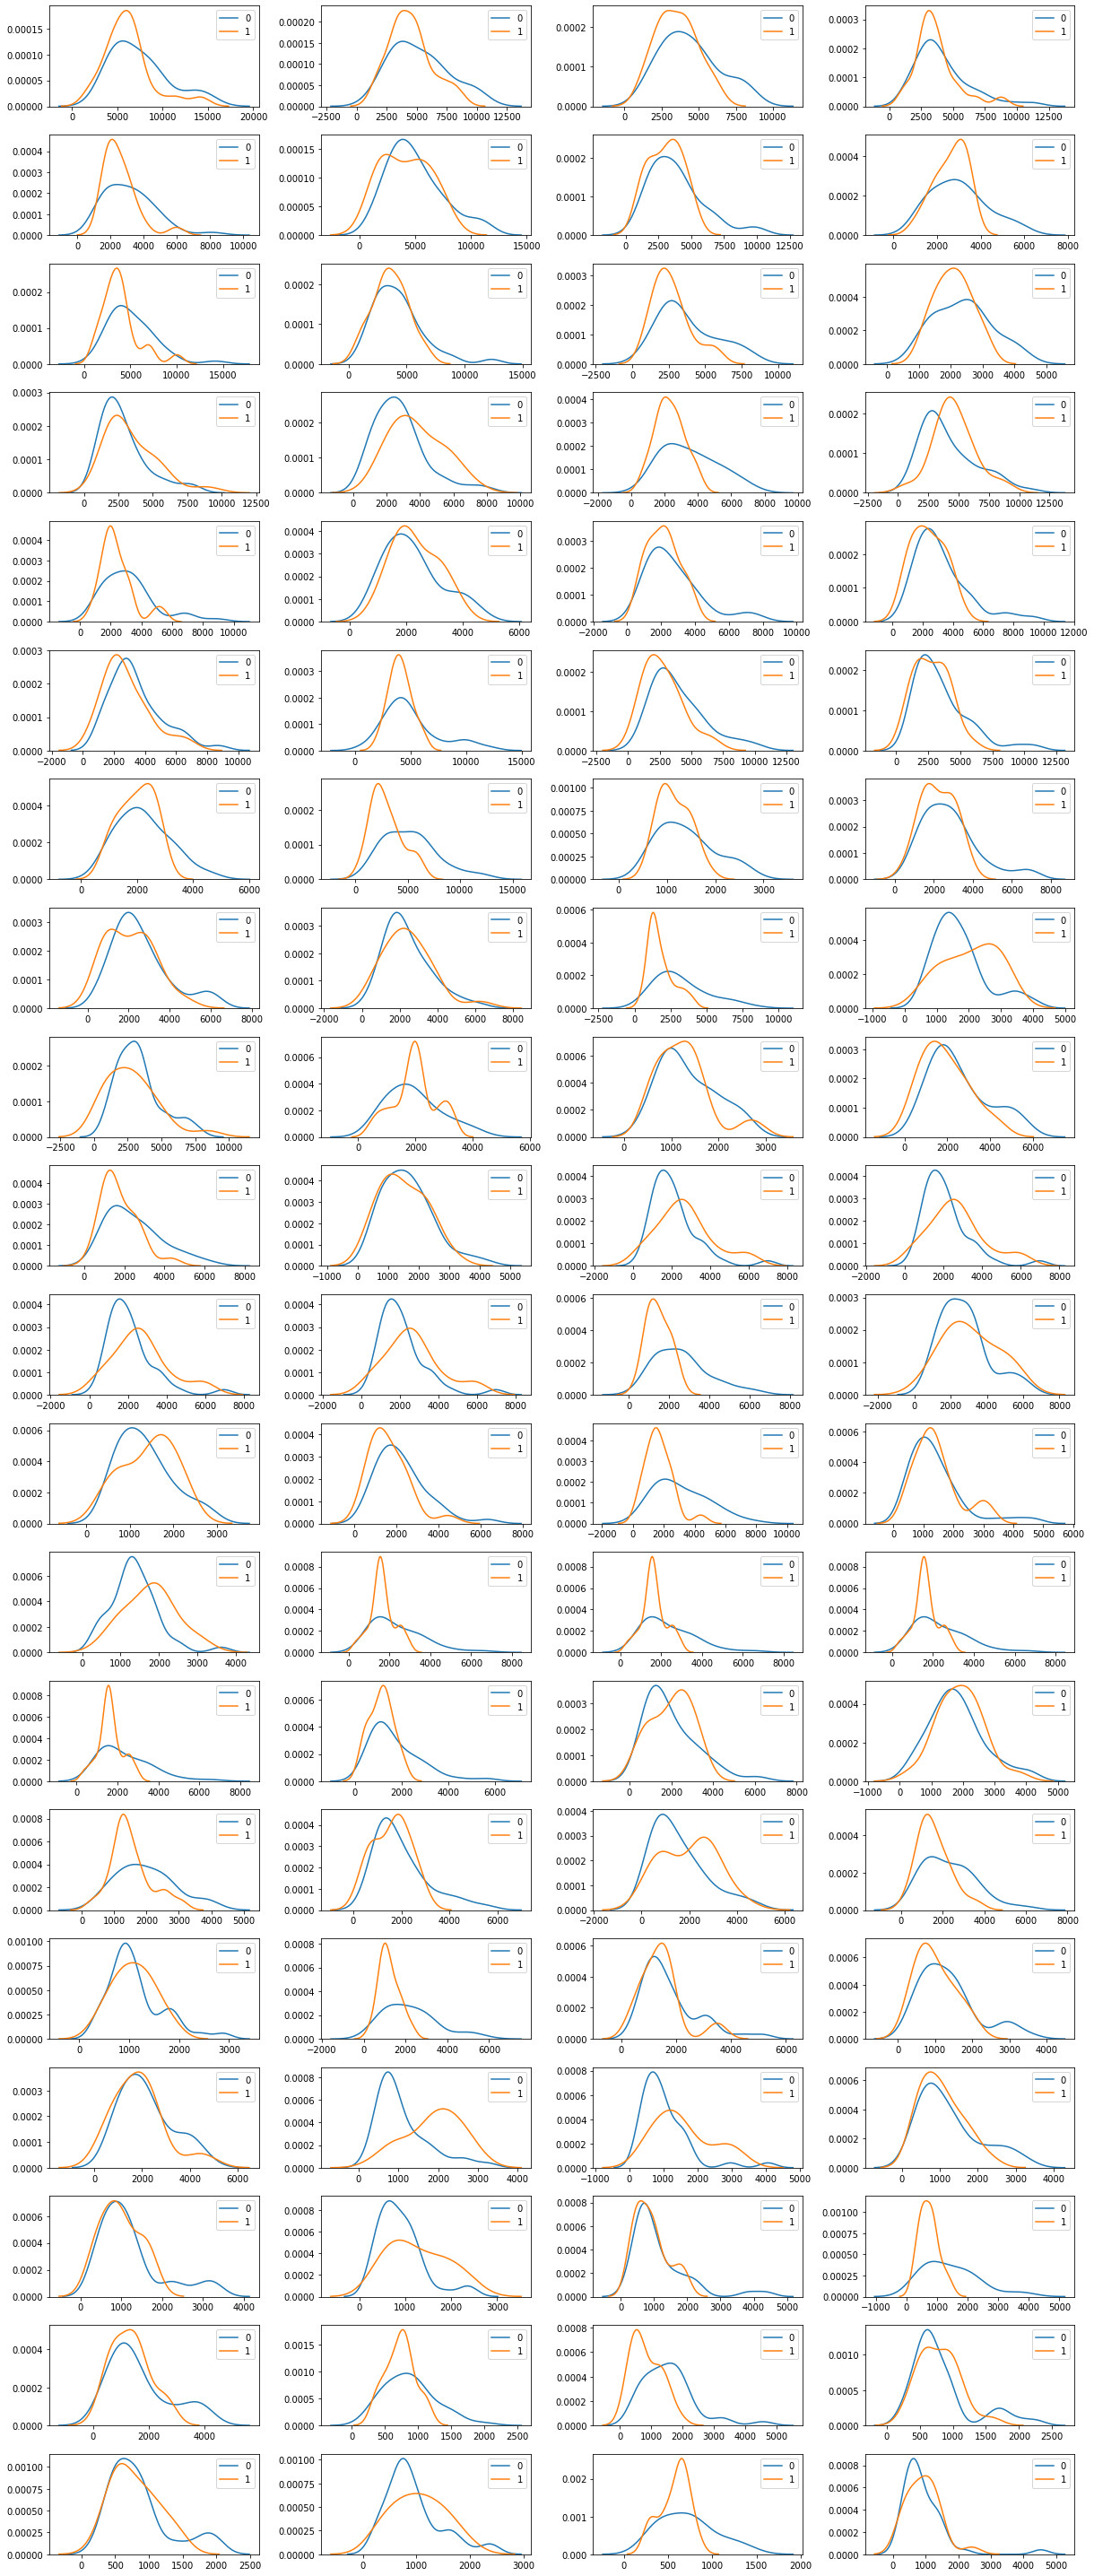

In [42]:
fig, ax = plt.subplots(20,4, figsize=(17,40))
feature_number = [str(i) for i in range(80)]
labels_number = [0, 1]
jj = -1
for ii, feature in enumerate(feature_number):
    if ii % 4 == 0:
        jj += 1
    for label in labels_number:
        sns.kdeplot(data_label[data_label['label']==label][feature].values.reshape(-1,), \
                    ax=ax[jj][ii % 4], label=label)
fig.tight_layout()
plt.show()


In [44]:
flag = 0
feature_Number = [str(i) for i in range(2000)]
for i in feature_Number:
    if data_label_1[i].max() >= data_label_0[i].max():
        flag += 1
print("The total number of the largest number in class 1 which is greater than the number in class 0 is {}".format(flag))
print("Thus, we can see that the datasets which indicate the normal tissue has a greater the largest number than the tumor tissue dataset.")


The total number of the largest number in class 1 which is greater than the number in class 0 is 243
Thus, we can see that the datasets which indicate the normal tissue has a greater the largest number than the tumor tissue dataset.


Consider the sample contamination, based on the paper:`Tissue Classification with Gene Expression Profiles`: Tumor and normal samples may dramatically differ in terms of their cell-type composition. In the colon cancer data (Alon et al. 1999), the authors observed that the normal colon biopsy also included smooth muscle tissue from the colon walls. As a result, smooth muscle related genes showed high expression levels in the normal samples compared to the tumor samples. To eliminate this effect we should remove the muscle specific genes. 

An additional form of “contamination” is due to the high metabolic rate of the tumors. This results in high expression values for ribosomal genes. Although such high expression levels can be indicative of tumors, such a finding does not necessarily provide novel biological insight into the process, nor does it provide a diagnostic tool since ribosomal activity is present in virtually all tissues. Thus, we also identified ribosomal genes in the top 200 scoring genes.

As the Paper's learning curves show, the removal of genes affects the results only in cases using the smallest sets of genes. From error score threshold of 10 (avg. 9.1 genes) and higher, there is no significant change in performance for the procedure. Thus, although muscle specific genes can be highly indicative, the classification procedure performs well even without relying on these genes.

有两种基因涉及data contamination： muscle specific genes & ribosomal genes， 但是最后检测结果： 原数据；删去muscle specific genes 的数据和两种基因都删去的数据没什么区别。 

我们在操作过程中要不要删去上面提到的基因？？ 大家讨论一下，然后我再修改这里。

### 1.5 Correlation

We want to get the correlations between different features.Use `pairplot()` function for visualise pair-wise relationships between variables.

In [45]:
names = data_label_1.columns.tolist()
names_10 = []
for i in names:
    if i == '10':
        break
    else:
        names_10.append(i)
data_label_1_10 = data_label_1.loc[:,names_10] 
data_label_0_10 = data_label_0.loc[:,names_10] 
##将前10个特征的列标签

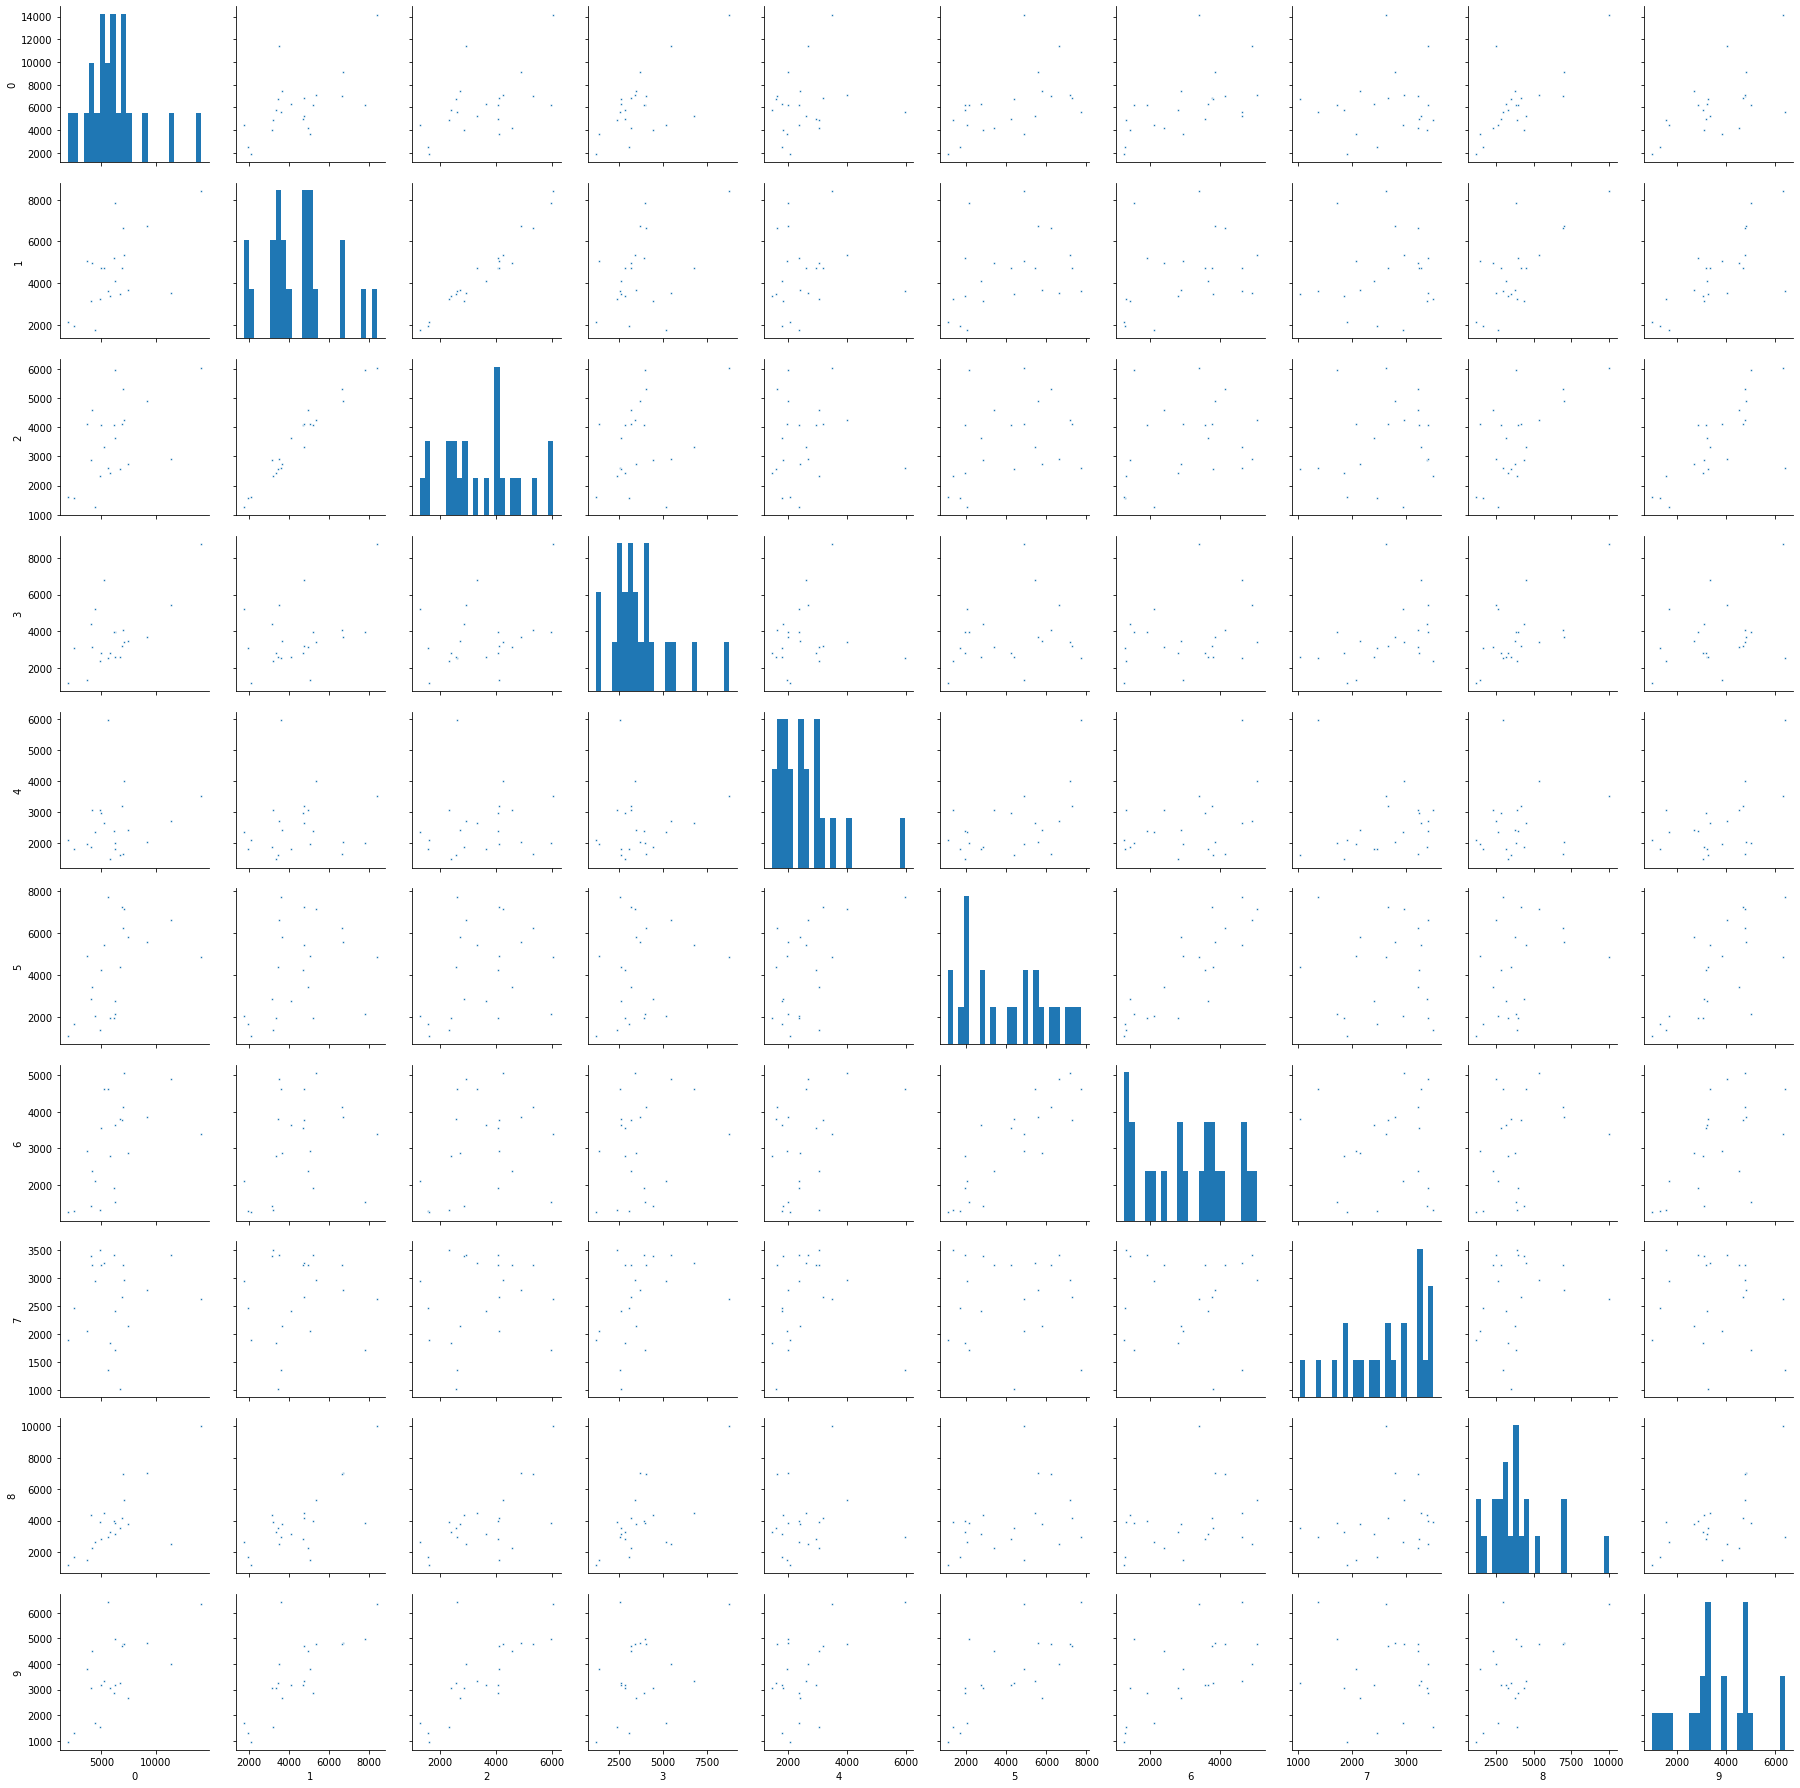

In [46]:
g = sns.pairplot(data_label_1_10, vars=[str(i) for i in data_label_1_10], \
                 plot_kws={'s' : 6}, diag_kws={'bins' : 25})
##Plot the catter plot for the first 10 attributes with label=1, get to correlation between these attributes.

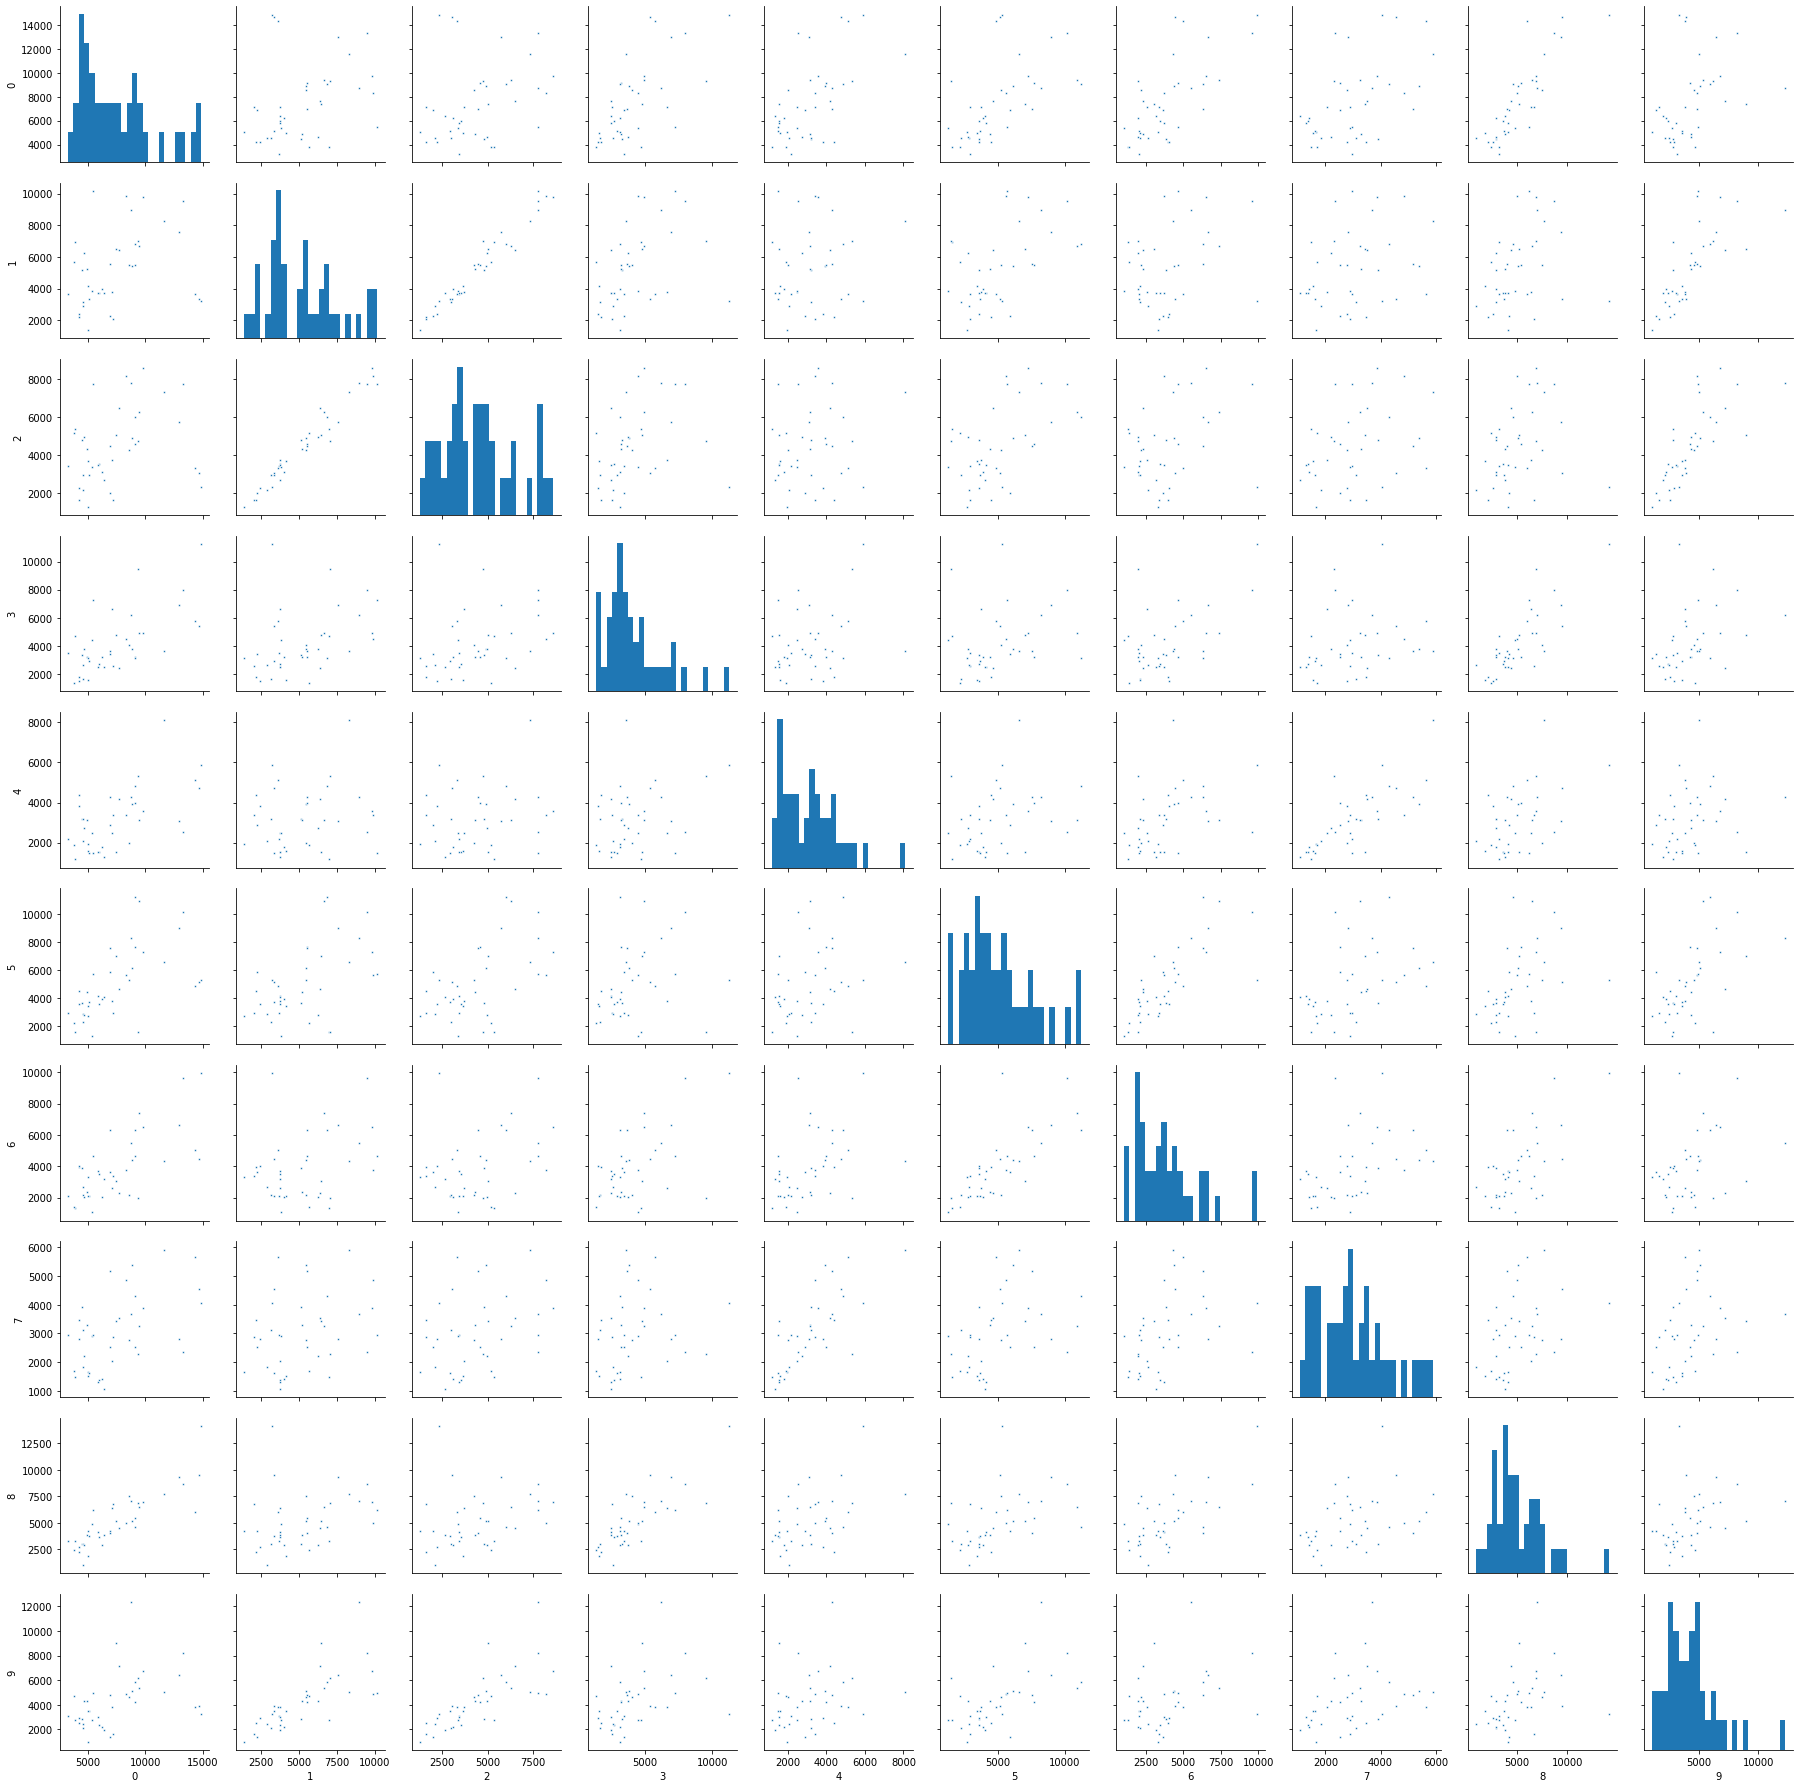

In [47]:
g = sns.pairplot(data_label_0_10, vars=[str(i) for i in data_label_0_10], \
                 plot_kws={'s' : 6}, diag_kws={'bins' : 25})
##Plot the catter plot for the first 10 attributes with label=0, get to correlation between these attributes.

We can see the feature of 2 and 3 in both class 0 and 1 may have the high correlations.

In [49]:
names = data_label_1.columns.tolist()
names_80 = []
for i in names:
    if i == '80':
        break
    else:
        names_80.append(i)
## Take the first 80 column lables

In [50]:
data_label_1_80 = data_label_1.loc[:,names_80] 
data_label_0_80 = data_label_0.loc[:,names_80] 
## Saperate the data based on the label 

In [51]:
correlations = data_label_1_80.corr()
fig = go.Figure(data=go.Heatmap(
                    z=correlations))
fig.show()
## Plot the hot plot of correlations between first 80 attributes (label=1)

In [52]:
correlations_0 = data_label_0_80.corr()
fig = go.Figure(data=go.Heatmap(
                    z=correlations_0))
fig.show()
## Plot the hot plot of correlations between first 80 attributes (label=0)

We can note that some features have the same number whether is subjected to class 0 or 1 so the correlation between them is the same. Thus, we can reduce the same colomn to one. 

我们是不是应该看一下是不是这些基因数据有重复的，我觉得我们既然在热力图中看到了有一样的数据就应该把他们删掉，然后再做后面的data mining。如果没有就不能说他们是same number

## 2. Data Mining
### 2.1 Data Pre-processing
We use `StandardScaler` function to standardize *colon cancer* data with zero mean and unit variance. After that, We calculate the correlation between each genes. We also calculate the percentage of the genes which have high correlation. This genes may be redundent.

In [53]:
scaler = StandardScaler()
colon_scale = scaler.fit_transform(colon)

In [60]:
corr = np.corrcoef(colon_scale, rowvar = False)
num = np.sum(corr > 0.6) - 2000
perc = round(num / (2000 * 2000 - 2000) * 100, 2)
perc

20.98

The percentage of genes with correlation greater than 0.6 is: 20.98%. Use PCA to do dimension reduction.

In [ ]:
# Simple PCA reduce the column dimenstion to 62
pca = PCA(n_components=62)
X_pca_62d = pca.fit_transform(colon_scale)
colon_label = pd.read_csv('label.csv')
#Convert the colon label and concatenate data and label.
colon_label = ConvertLabels(colon_label)
scatter_2d_label(X_pca_62d, colon_label)
colon_label = np.c_[colon_label].reshape(-1,)

# The performance 

In [63]:
# the cumulative explained variance ratio for different number of PCs.
np.cumsum(pca.explained_variance_ratio_)

array([0.44955648, 0.54801902, 0.61566943, 0.67222138, 0.70505585,
       0.736347  , 0.75966579, 0.7818428 , 0.79851387, 0.81403902,
       0.82787177, 0.83993946, 0.85035145, 0.8600838 , 0.86854132,
       0.87640445, 0.88414674, 0.89081004, 0.89712368, 0.90300485,
       0.90852608, 0.91377366, 0.91874948, 0.92356079, 0.92812303,
       0.93226267, 0.93633708, 0.94017141, 0.94367086, 0.94699633,
       0.95017446, 0.95319452, 0.95611859, 0.95900835, 0.9617109 ,
       0.96424176, 0.96669363, 0.96903059, 0.9712017 , 0.97331889,
       0.97530488, 0.97723884, 0.97907849, 0.98086708, 0.98261222,
       0.98427997, 0.98587281, 0.98741106, 0.98879838, 0.99014444,
       0.99142942, 0.99265798, 0.9937625 , 0.99482734, 0.99580377,
       0.99672401, 0.99754792, 0.99834631, 0.99899087, 0.99957563,
       1.        , 1.        ])

In [136]:
def scatter_2d_label(X_2d, y, s=2, alpha=0.5, lw=2):
    """Visualuse a 2D embedding with corresponding labels.
    
    X_2d : ndarray, shape (n_samples,2)
        Low-dimensional feature representation.
    
    y : ndarray, shape (n_samples,)
        Labels corresponding to the entries in X_2d.
        
    s : float
        Marker size for scatter plot.
    
    alpha : float
        Transparency for scatter plot.
        
    lw : float
        Linewidth for scatter plot.
    """
    targets = np.unique(y)
    colors = sns.color_palette(n_colors=targets.size)
    for color, target in zip(colors, targets):
        plt.scatter(X_2d[y == target, 0], X_2d[y == target, 1], color=color, label=target, s=s, alpha=alpha, lw=lw)

In [137]:
def scatter_3d_label(X_3d, y, fig=None, s=2, alpha=0.5, lw=2):
    """Visualuse a 3D embedding with corresponding labels.
    
    X_3d : ndarray, shape (n_samples,3)
        Low-dimensional feature representation.
    
    y : ndarray, shape (n_samples,)
        Labels corresponding to the entries in X_3d.
        
    s : float
        Marker size for scatter plot.
    
    alpha : float
        Transparency for scatter plot.
        
    lw : float
        Linewidth for scatter plot.
    """
    from mpl_toolkits.mplot3d import Axes3D
    if fig is None:
        fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, projection='3d')

    targets = np.unique(y)
    colors = sns.color_palette(n_colors=targets.size)
    for color, target in zip(colors, targets):
        ax.scatter(X_3d[y == target, 0], X_3d[y == target, 1], X_3d[y == target, 2], 
                    color=color, s=s, label=target, alpha=alpha, lw=lw)
    return (fig, ax)

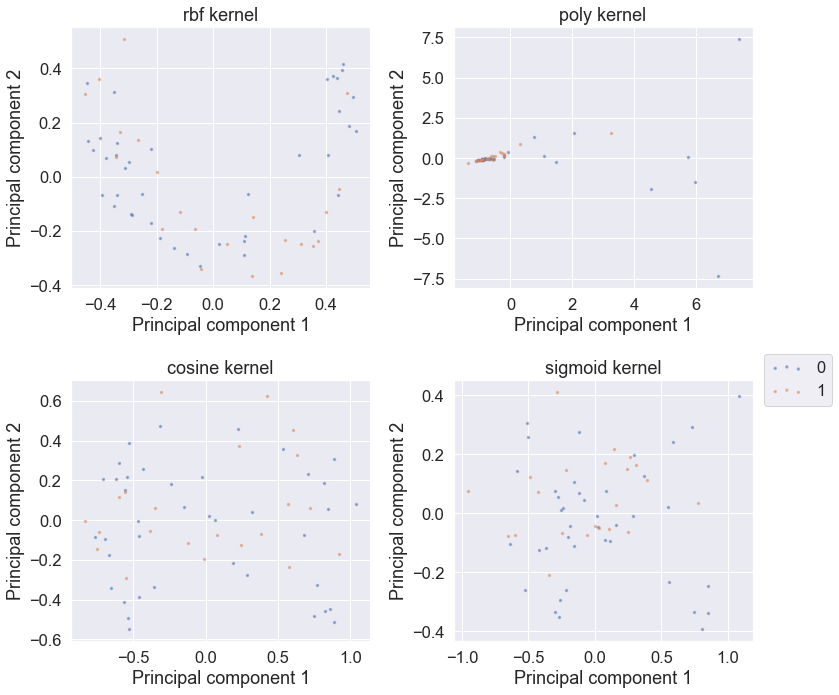

In [138]:
# Use Kernel PCA to reduce dimensiont from 2000 to 2 and plot to visulaization
kernels = ['rbf', 'poly', 'cosine', 'sigmoid']

sns.set(font_scale=1.5)
fig, ax = plt.subplots(2,2,figsize=(12,10))
for ii, kernel in enumerate(kernels):
    X_kpca_2d = KernelPCA(n_components=2, kernel=kernel).fit_transform(colon_scale)
    plt.subplot(2,2,ii+1)
    scatter_2d_label(X_kpca_2d, colon_label)
    plt.title('{} kernel'.format(kernel))
    plt.xlabel('Principal component 1')
    plt.ylabel('Principal component 2')
plt.legend(loc='center left', bbox_to_anchor=[1.01, 1.], scatterpoints=3)
fig.tight_layout()
plt.show()

None of these kernel PCA have good performances. 

### 2.2 Feature Selection-Select Data by AUC Value
We first scale the colon data into [0,1] range. Then we make two assumptions, 'Higher value of each gene represent higher probability of getting tumor tissue' and 'Lower value of each gene represent higher probability of getting tumor tissue'. Then we calculate the two auc values. After that, we select genese with auc value greater than 0.8. To examine the performance of data selection, We use KNN classifier with 1 neighborhood as our baseline model and original data with 2000 genes as baseline data. Then we compare the performance of model after feature selection. The results can be seen in the later part.

In [69]:
#normalize the data
minmax = MinMaxScaler()
colon_norm = minmax.fit_transform(colon)
#choose the gene with auc > 0.8
colon_org = colon_norm.copy()
auc = np.ones(2000)
auc_reverse = np.ones(2000)
#calculate two auc values
for i in range(2000):
    auc[i] = roc_auc_score(np.c_[colon_label], colon_org[:,i])
    
for i in range(2000):
    auc_reverse[i] = roc_auc_score(np.c_[colon_label], 1 - colon_org[:,i])

#select data by choosing auc > 0.8
auc_index = list(np.where(auc > 0.8)[0])
#auc_index = []
auc_index_reverse = list(np.where(auc_reverse > 0.8)[0])
#auc_index_reverse = []
colon_select = colon.iloc[:, auc_index + auc_index_reverse]#list addition

In [83]:
#Standardize data after selection
scaler_select = StandardScaler()
colon_select_scale = scaler_select.fit_transform(colon_select)
colon_select_scale.shape # Select 22 attributes from the previous 2000 attributes.

(62, 22)

## 3. Classification 
Since the simple size is small so we cannot split the data into train and test set. We use leave one out Cross Validation to train the the classifier.

### 1.Baseline 
we need find a simple classification procedures as baseline. Nearest neighbour is one of the simplest classification procedures. Given a new data $x$, the nearest neighbor classification procedure searches for the data $y$ in the data that maximizes $K_p(x,y)$ , and returns the label of $y$.

$$K_p(x,y)=\frac{E[(x-E(x))(y-E(y))]}{\sqrt{Var[x]Var[y]}}$$
 

In [72]:
def knnclf(X_train, y_train, Type='original'):
    '''
    This function use Nearest neighbour and print out the score
    of average leave one out cross validation accuracy.
    '''
    
    #Using KNN classifier as baseline model
    clf = KNeighborsClassifier(n_neighbors=1)
    #choose sample size as n (number of samples)
    cv = KFold(n_splits=X_train.shape[0])
    #store the validation results
    cv_results = cross_validate(clf, X_train, y_train, cv=cv)
    #using average validation results as comparasion
    print ("KNN classifier accuracy of {} data: {:.3f}".format(
        Type, np.mean(cv_results['test_score'])))

In [75]:
knnclf(colon_select_scale, colon_label, 'selected')
knnclf(colon, colon_label)

KNN classifier accuracy of selected data: 0.806
KNN classifier accuracy of original data: 0.790


From above test, We can find the accuracy of selected data by using AUC value can increase 0.016 classification accuracy. Later we will discuss about other featuer selection methods such as univariate feature selection and TNoM feature selection.

In [101]:
X_train = colon_select_scale
y_train = colon_label

In [102]:
pca = PCA(n_components=X_train.shape[1])
X_select_pca_62d = pca.fit_transform(colon_select_scale)

In [103]:
## Try different classifiers
random_state = 1234
names = ["Logistic Regression", "Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net (Multi-layer perceptron)",
         "Naive Bayes", "LDA", "QDA"]
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=9), ## 这里是不是应该用neighbour = 1， 毕竟他是baseline
    SVC(kernel="linear", probability=True, random_state=random_state),
    SVC(kernel='rbf', probability=True, random_state=random_state),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=50,random_state=random_state),
    MLPClassifier(random_state=random_state, max_iter=1000),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
]
ca_score = {} # Classification accuracy
ce_score = {} # Cross-entropy
for name, clf in zip(names, classifiers):
    cv = KFold(X_train.shape[0], True, random_state=123)
    cv_results = cross_validate(clf, X_train, y_train, cv=cv)
    clf.fit(X_train, y_train)
    #ca_score[name] = clf.score(X_test, y_test)
    ca_score[name] = np.mean(cv_results['test_score'])
    ce_score[name] = log_loss(y_train, clf.predict_proba(X_train))
print('Classification performance on validation set:')
for clf in names:
    print ("{}, accuracy: {:.3f}, log-loss: {:.3f}".format(clf, ca_score[clf], ce_score[clf]))

Classification performance on validation set:
Logistic Regression, accuracy: 0.871, log-loss: 0.178
Nearest Neighbors, accuracy: 0.871, log-loss: 0.265
Linear SVM, accuracy: 0.855, log-loss: 0.251
RBF SVM, accuracy: 0.871, log-loss: 0.254
Decision Tree, accuracy: 0.823, log-loss: 0.000
Random Forest, accuracy: 0.871, log-loss: 0.081
Neural Net (Multi-layer perceptron), accuracy: 0.823, log-loss: 0.021
Naive Bayes, accuracy: 0.823, log-loss: 2.098
LDA, accuracy: 0.774, log-loss: 0.156
QDA, accuracy: 0.645, log-loss: 0.000


Then we choose four reliable classifiers to compare the performance of choosing 10 PCs.

*有点看不懂 10pc是干什么的,而且我出来的log loss 有0 ，不懂咋回事



In [104]:
random_state = 1234
names = ["Nearest Neighbors", "Linear SVM",
         "Decision Tree", "Random Forest"]
classifiers = [
    KNeighborsClassifier(n_neighbors=9), ## 同理：这里是不是应该用neighbour = 1， 毕竟他是baseline 
    SVC(kernel="linear", probability=True, random_state=random_state),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=50,random_state=random_state),
]
ca_score = {} # Classification accuracy
ce_score = {} # Cross-entropy
for name, clf in zip(names, classifiers):
    cv = KFold(X_train.shape[0], True, random_state=1234)
    cv_results = cross_validate(clf, X_train, y_train, cv=cv)
    clf.fit(X_train, y_train)
    #ca_score[name] = clf.score(X_test, y_test)
    ca_score[name] = np.mean(cv_results['test_score'])
    ce_score[name] = log_loss(y_train, clf.predict_proba(X_train))
print('Classification performance on validation set:')
for clf in names:
    print ("{}, accuracy: {:.3f}, log-loss: {:.3f}".format(clf, ca_score[clf], ce_score[clf]))

Classification performance on validation set:
Nearest Neighbors, accuracy: 0.871, log-loss: 0.265
Linear SVM, accuracy: 0.855, log-loss: 0.251
Decision Tree, accuracy: 0.823, log-loss: 0.000
Random Forest, accuracy: 0.871, log-loss: 0.081


Using only Linear SVM to compare the accuracy of choosing different number of PC components. Set the parameter C equal to 0.01 and gamma equal to 0.001.

In [105]:
random_state = 1234
names = ['Linear SVM']
classifiers = [
    SVC(kernel="linear", probability=True, random_state=random_state),
]

ca_score = {} # Classification accuracy
ce_score = {} # Cross-entropy
cv_results = {}

#set n_splits equal to the number of training samples
cv = KFold(n_splits=X_train.shape[0], shuffle=True)
for i in range(X_train.shape[1]):
    for name, clf in zip(names, classifiers):
        #Store corss validate results of using different number of PC components
        #X_train and y_train can be found before
        cv_results[i] = cross_validate(clf, X_train[:,0:i+1], y_train, cv=cv)
        
        #choosing 'test_score' in cv results and average the test score, test 
        #score means accuracy of choosing different fold. Because only 
        #exit one test data, the accuracy is either 1 or 0.
        ca_score[i] = np.mean(cv_results[i]['test_score'])

In [106]:
# LOOCV results
cv_results[0]

{'fit_time': array([0.00142384, 0.00124216, 0.00118613, 0.00114298, 0.00125599,
        0.00102496, 0.00102711, 0.00100899, 0.00100994, 0.00102901,
        0.00099277, 0.00096083, 0.00093675, 0.00095892, 0.00112891,
        0.00121117, 0.00089908, 0.00087714, 0.00099206, 0.00086117,
        0.00081897, 0.0007782 , 0.00078607, 0.00077176, 0.00085092,
        0.00083089, 0.00171685, 0.00086021, 0.0007863 , 0.0007751 ,
        0.00097084, 0.00093603, 0.00077319, 0.00078321, 0.00078321,
        0.00077987, 0.00078201, 0.00077915, 0.00074291, 0.00078106,
        0.00077295, 0.00076413, 0.0008781 , 0.00076699, 0.00080514,
        0.00075412, 0.00076818, 0.00076199, 0.00075293, 0.00075698,
        0.00086784, 0.00075793, 0.00075126, 0.00074792, 0.00075293,
        0.00075102, 0.00075412, 0.00075412, 0.00088596, 0.00073695,
        0.000736  , 0.00072813]),
 'score_time': array([0.00052905, 0.00031781, 0.00030684, 0.00030589, 0.00029016,
        0.00027204, 0.000278  , 0.00026798, 0.000319  , 

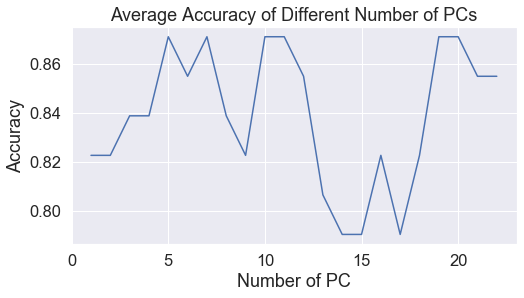

In [109]:
# Line plot of average test score of different number of PC components
fig, ax = plt.subplots(1, 1, figsize = (8, 4))
plt.subplot(111)

sns.lineplot(x = list(range(1, X_train.shape[1]+1)), y = list(ca_score.values()))
plt.xlabel('Number of PC')
plt.ylabel('Accuracy')
plt.title('Average Accuracy of Different Number of PCs')
plt.show()

# 、这个图也不一样，晕

In [108]:
# choose the useful PCs
cv_result1 = cross_validate(clf, X_train[:,[1,2,3,9]], y_train, cv=cv)
np.mean(cv_result1['test_score'])

0.8870967741935484

Use `gridsearchcv` function to choose the best C and gamma for SVM

In [94]:
cv = KFold(5, shuffle=True, random_state=1234)
clf = SVC(kernel='rbf')
parameters = {'C': np.logspace(-3,3,7), 'gamma': np.logspace(-4, 1, 6)}
svc_clf = GridSearchCV(
        estimator=clf,
        cv=cv,
        param_grid=parameters,
        scoring='accuracy'
        ).fit(X_pca_62d, colon_label)
cv_results = cross_validate(svc_clf, X_pca_62d, colon_label, cv=cv)
np.mean(cv_results['test_score'])

0.8230769230769232

##  个人看这部分的时候有点晕（我不懂这部分的结构和思路，求大神指点）

## 4. Data exploration using hierarchical clustering
## 4.1 Hierarchical clustering for genes
The following picture shows a hierarchical clustering for genes that is created by iteratively joining 2 closest clusters starting from singleton clusters. After joining a pair of clusters, the distance between all the new joined clusters and all other clusters are recalculated. In fact, the average linkage method that measures the average distances between the members of 2 clusters is used.
When setting a distance threshold of 7.5, we can see that there are 3 major gene clusters along with some smaller gene clusters. We hypothesize potentially, simlar genes within a cluster are related to each other, such as being in a same function group. Although hierarchical clustering can be a good data exploratory technique, but it is very difficult to verify our hypothesis because of the large amount of genes (2000) involved.

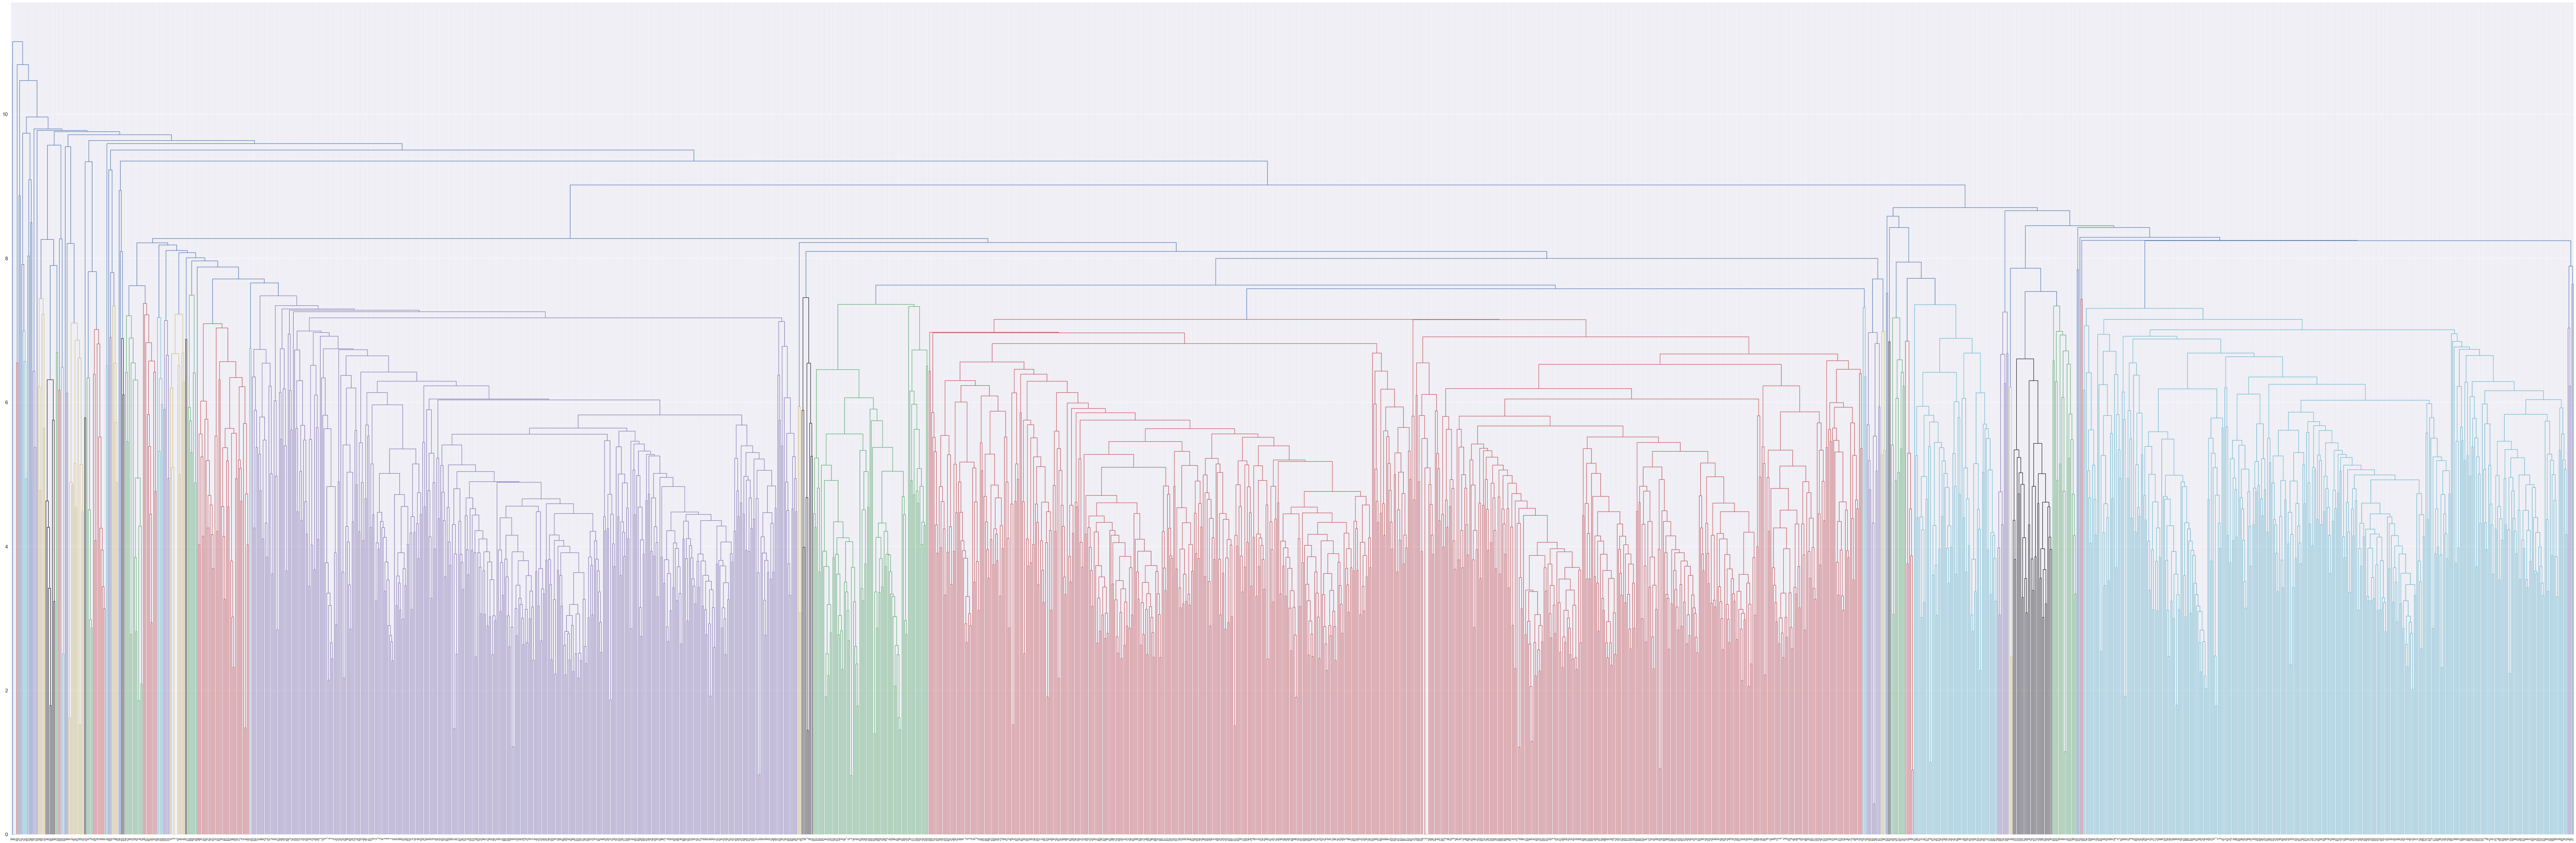

In [114]:
linked    = linkage(colon_scale.T, 'average')
labelList = range(1, 2001)
plt.figure(figsize=(150, 50))
dendrogram(linked,
           orientation='top',
           color_threshold=7.5,
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()
#plt.savefig('GeneHierarchicalClusteringAverage.png')

## 4.2 Hierarchical clustering for tissues

The following picture shows a hierarchical clustering for tissues. Similarly, the clustering is created by iteratively joining 2 closest clusters starting from singleton clusters. The common average linkage method is used.
When setting a distance threshold of 53, we can see that normal tissues 2, 10, 12, 22, 42, 48, 50, and 54 stay inside the same cluster, which is coloured in light blue in the picture below. Then, almost all of the remaining healthy tissues (4, 6, 8, 14, 16, 18, 20, 24, 39, 51, 55, 60, 62) stay inside the largest red cluster. The only exception is the healthy tissue 43 which stays far away from both the red and light blue clusters. Lastly, although some cancer tissues are also inside the red and light blue clusters, the 2 outer clusters which are far away from the red and light blue clusters consists mainly of only cancer tissues.

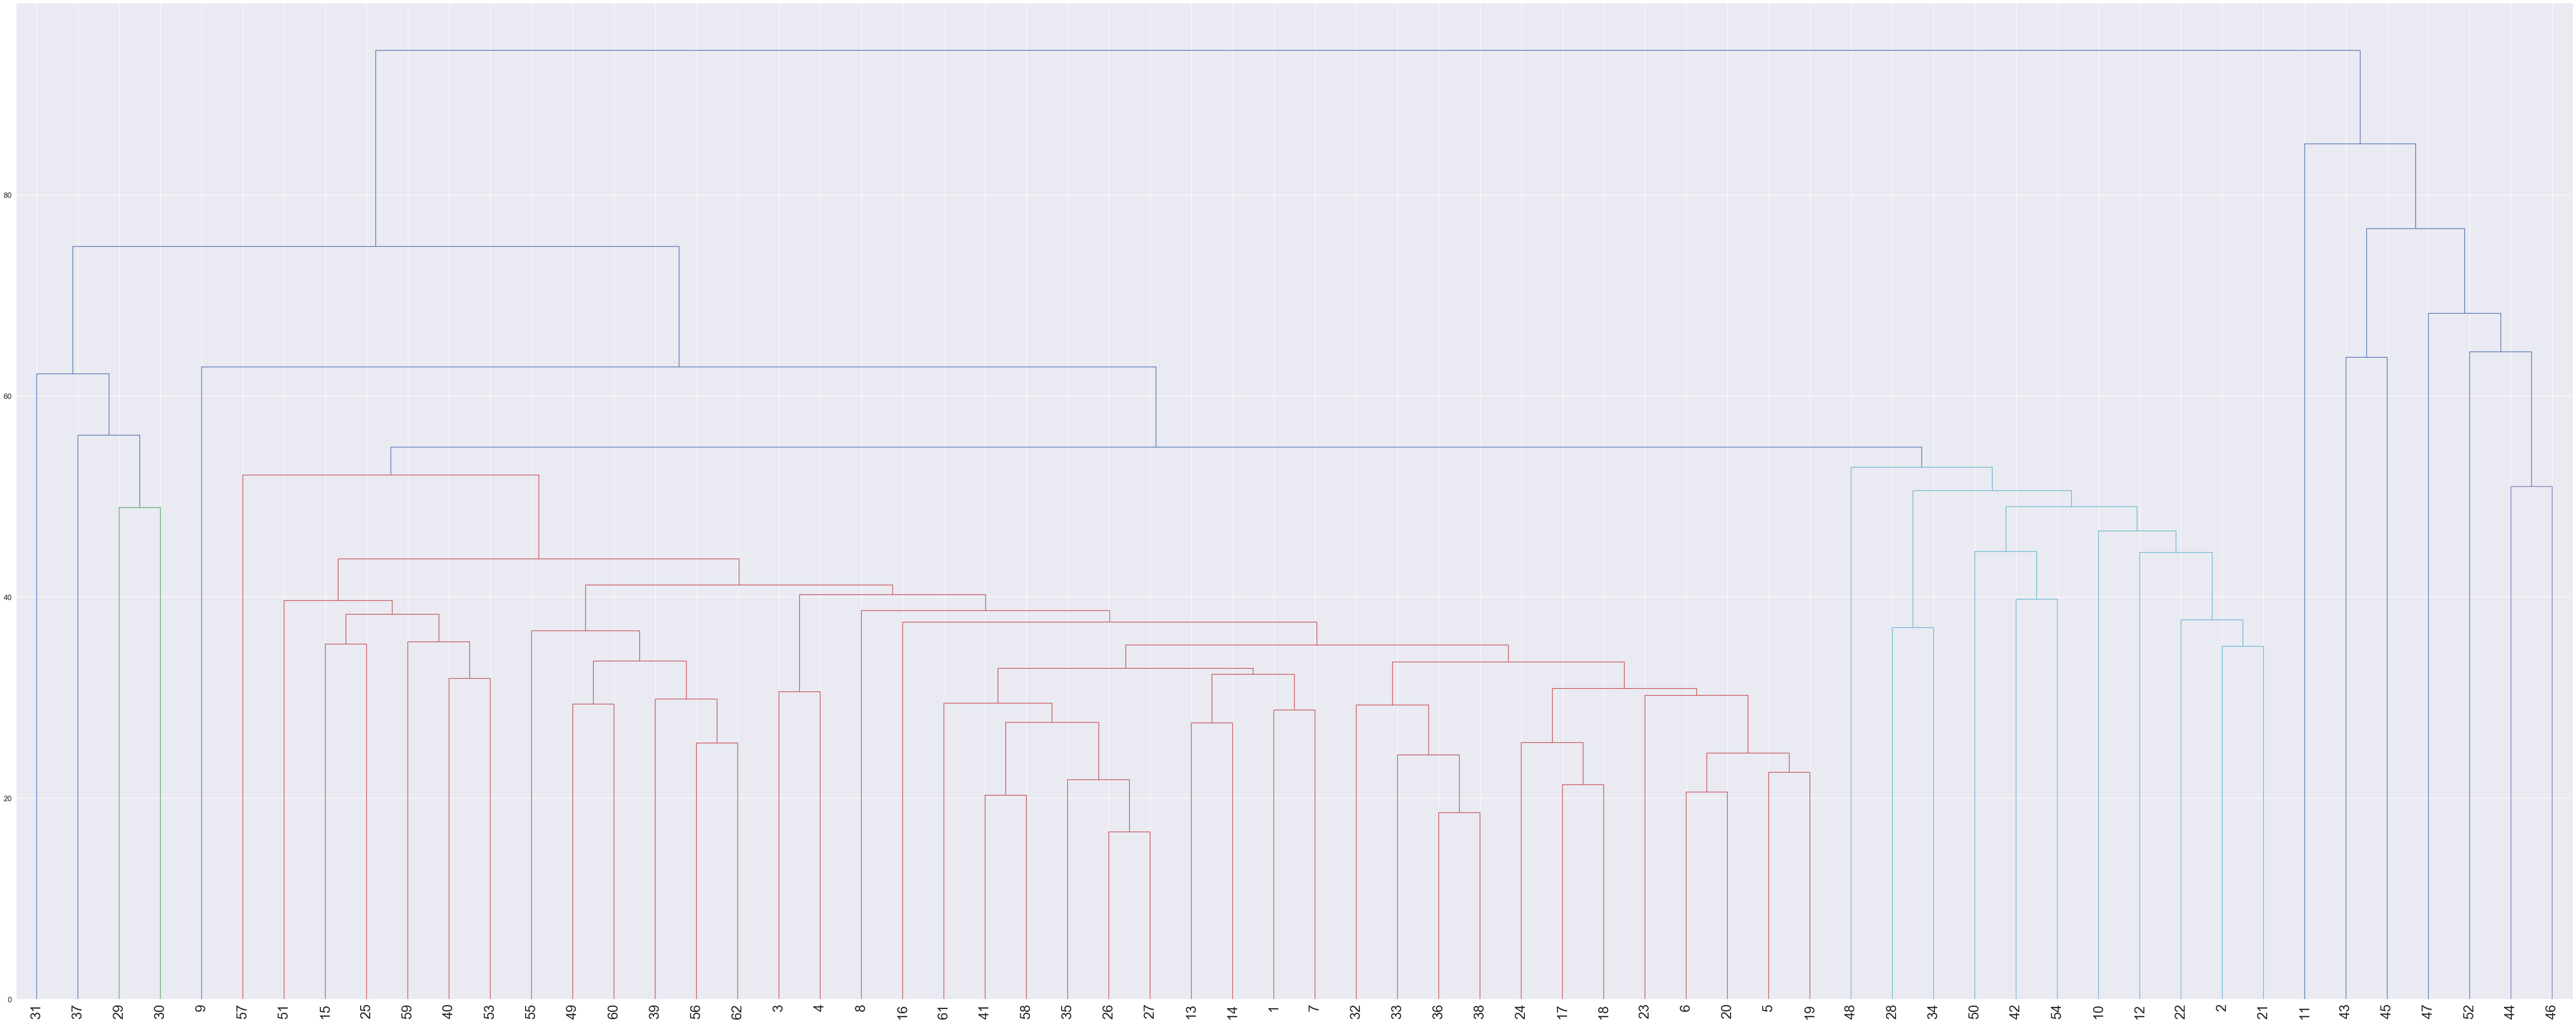

In [116]:
linked    = linkage(colon_scale, 'average')
labelList = range(1, 63)
plt.figure(figsize=(100, 40))
dendrogram(linked,
           orientation='top',
           labels=labelList,
           distance_sort='descending',
           color_threshold=53,
           show_leaf_counts=True,
           leaf_font_size=30)
#plt.show()
plt.savefig('PatientHierarchicalClusteringAverage.png')

## 4.3 Cluster maps
A cluster map for both tissues (rows) and genes (columns) is shown below. Again, the common average linkage method is used. The grid cells show the standardised value of each gene expression, with light red indicating a positive value, and dark red indicating a negative value.
Although we can see that tissues at the bottom of the cluster map tend to have more positive values (light red grid cells), but those tissues are made up of both healthy tissues (10, 42, 43, 51) and cancer tissues (44, 45, 46). Hence, from this analysis, we think that the data is quite noisy and will require representative features selection before classification can be made.

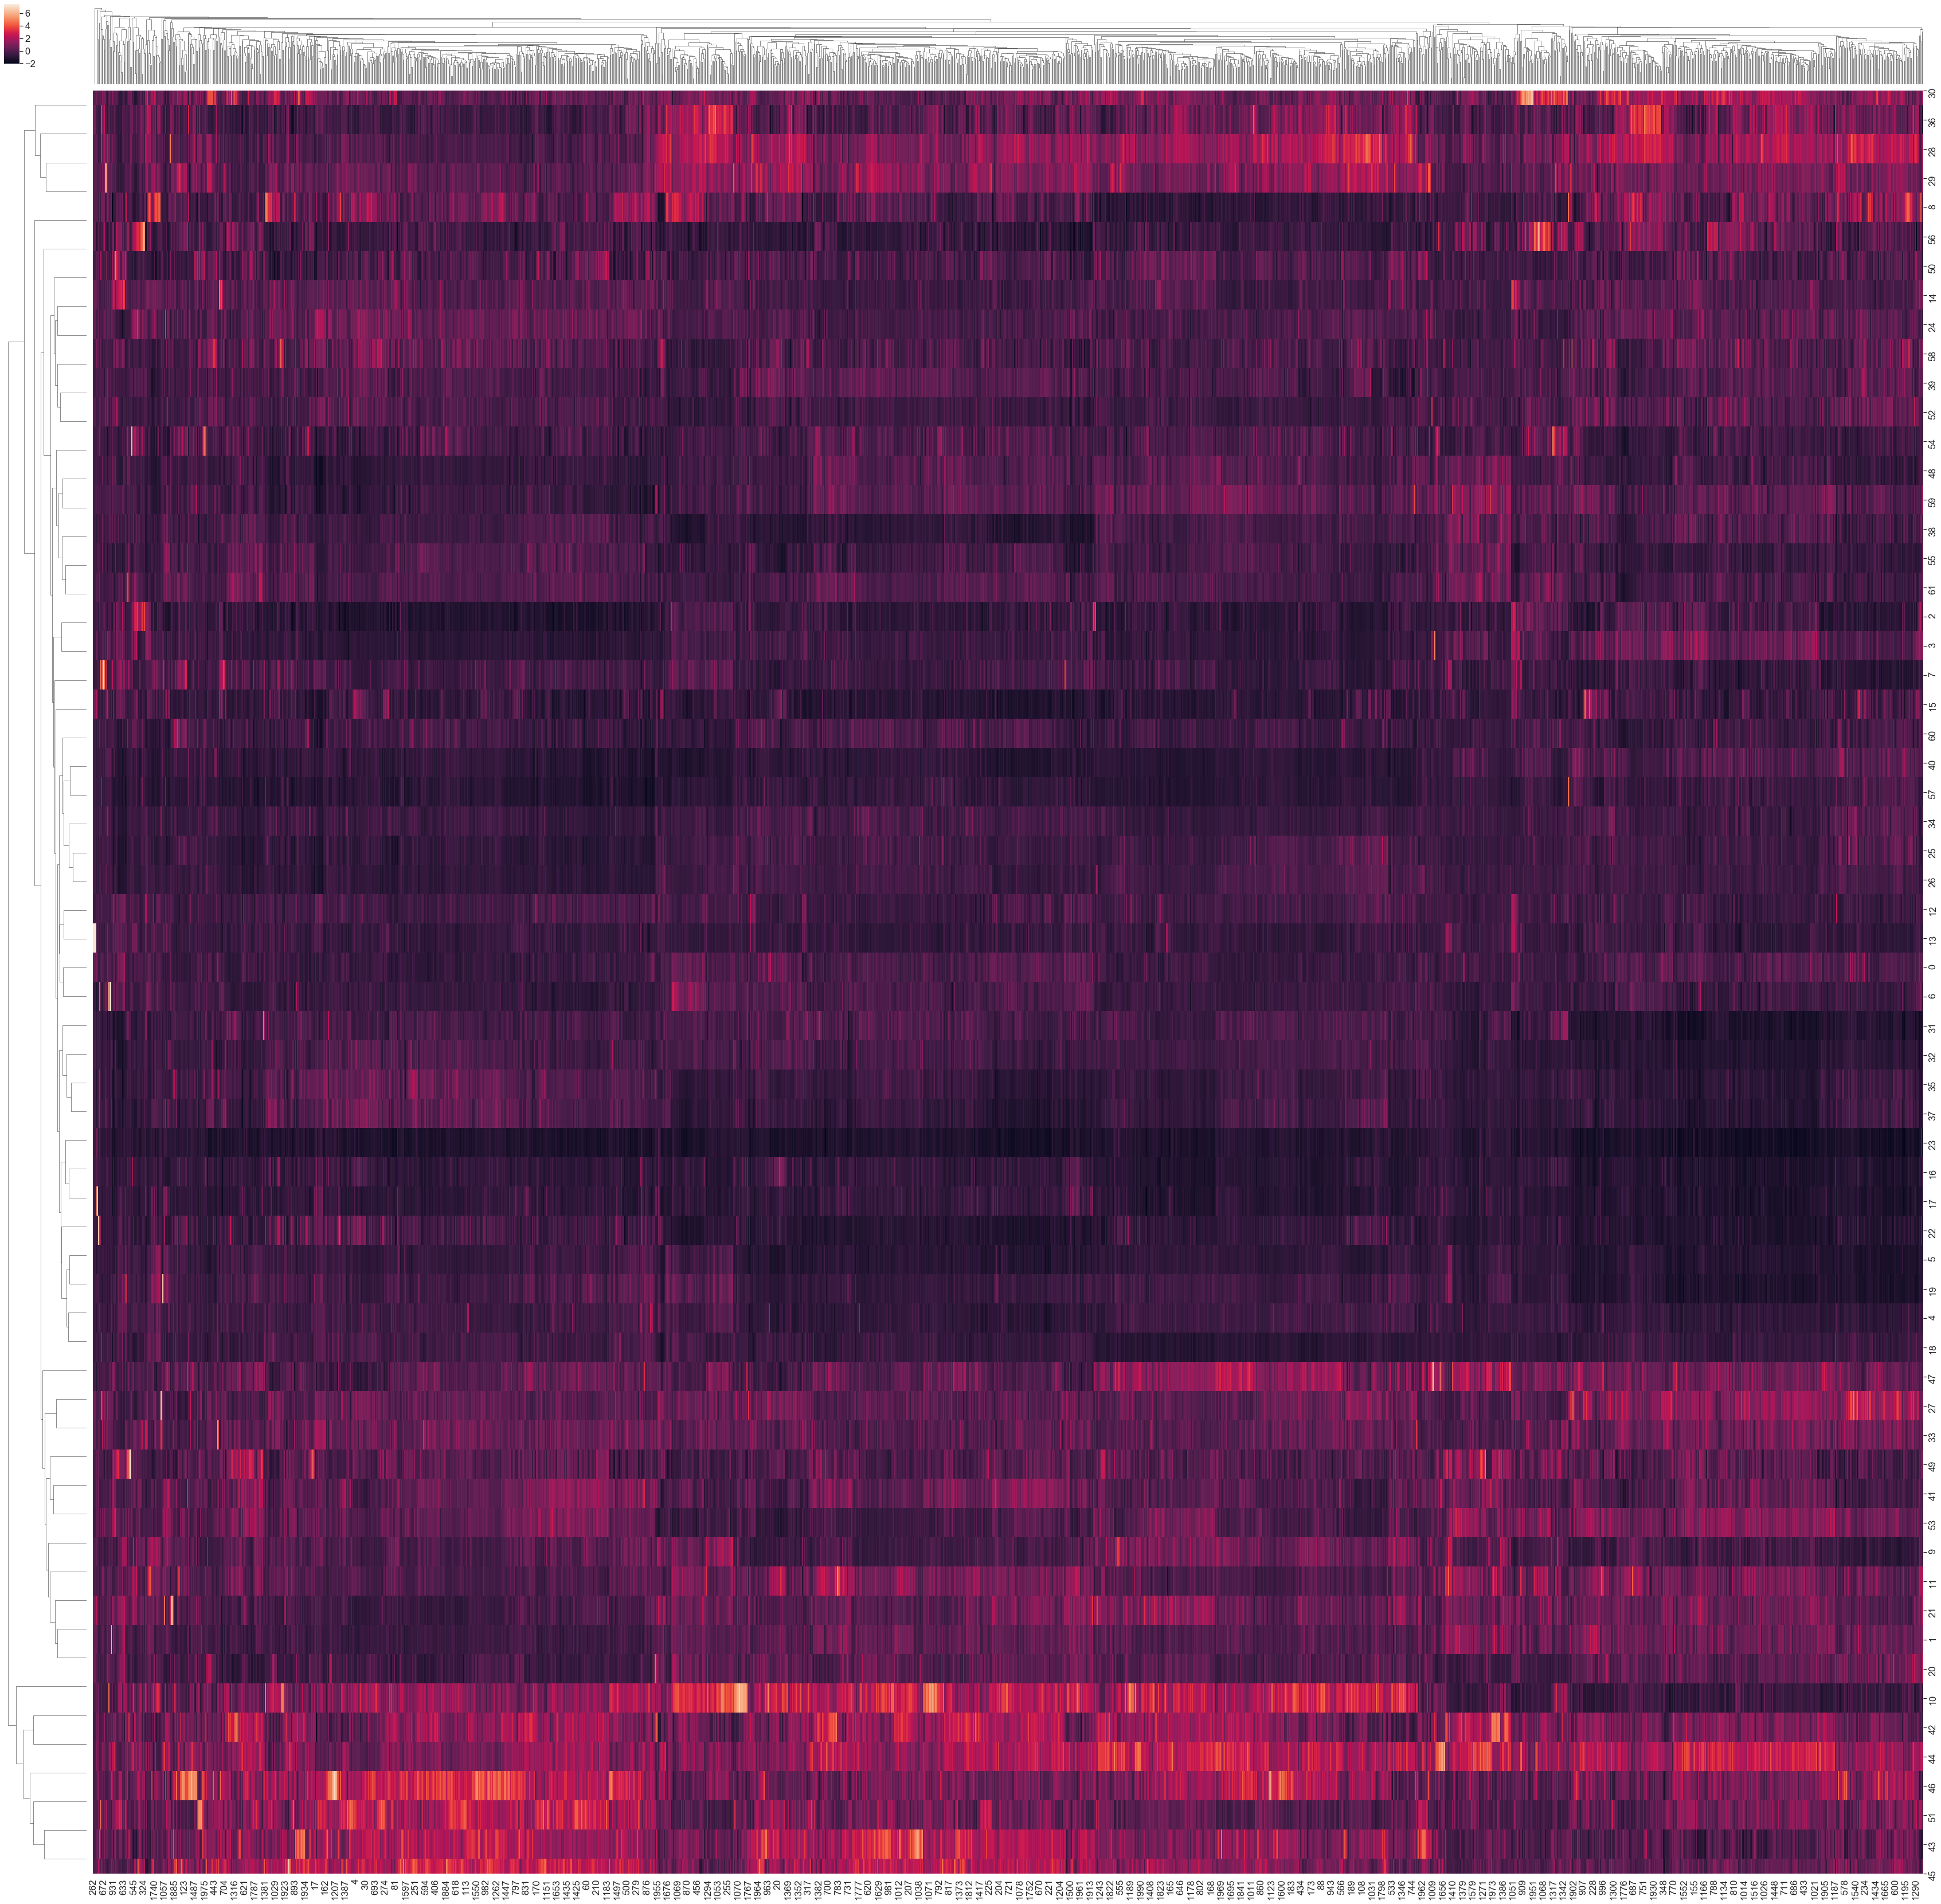

In [118]:
sns.set(color_codes=True)
sns.set(font_scale=1.5)
sns.clustermap(colon_scale, method="average", figsize=(60, 60))